As usual, we will start by importing the data. We will perform analysis and train the model on the training data. The model will then be validated on the test data.

In [191]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [192]:
# to plot prette figures

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [193]:
train = pd.read_csv("../input/titanic/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [194]:
test = pd.read_csv("../input/titanic/test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Combining the training and the tests sets for the purpose of exploration. First, we need to add a unique column to each dataset to make it easy to separate the clean data into the original train and test data. We also have to add a null 'Survivor' column to the test data so both datasets have same columns

In [195]:
test['Survived'] = np.NaN
test['train/test'] = 1
train['train/test'] = 0
data = pd.concat([train, test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [196]:
data.shape

(1309, 13)

In [197]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train/test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


## Data Exploration

In [198]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train/test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0


Separating the categorical from the numeric columns

In [199]:
# separating categorical from numeric columns
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

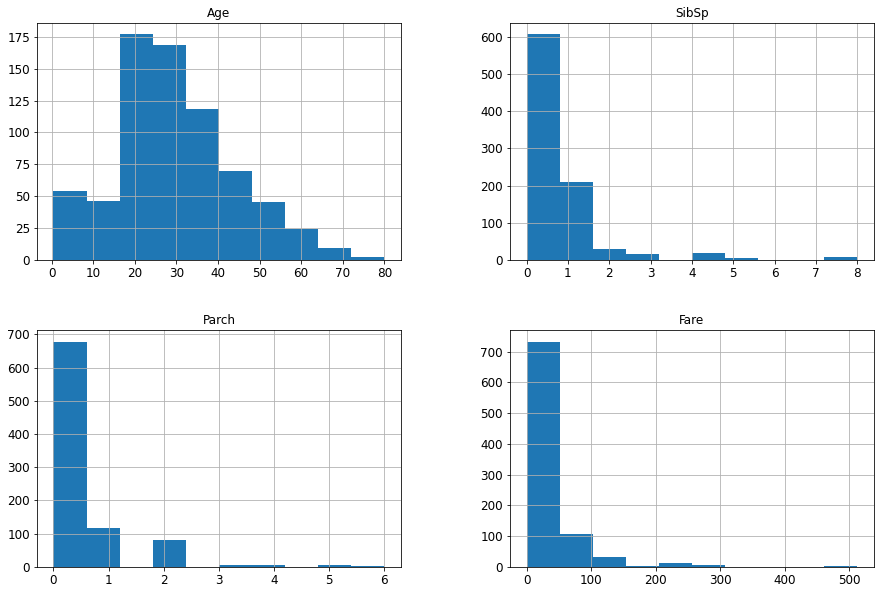

In [200]:
#viewing the distribution of the numeric data

train_num.hist(figsize=(15,10))
plt.show()

We won't need to normalize 'Age' since it has a fairly normal distribution. Fare is the most skewed so will need normalization

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


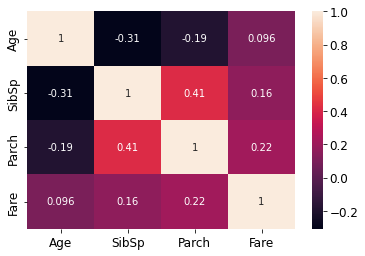

In [201]:
# looking correlations between the features. (This would have been more useful in a regression problem to avoid multicolinearity)

sns.heatmap(train_num.corr(),annot=True)
print(train_num.corr())

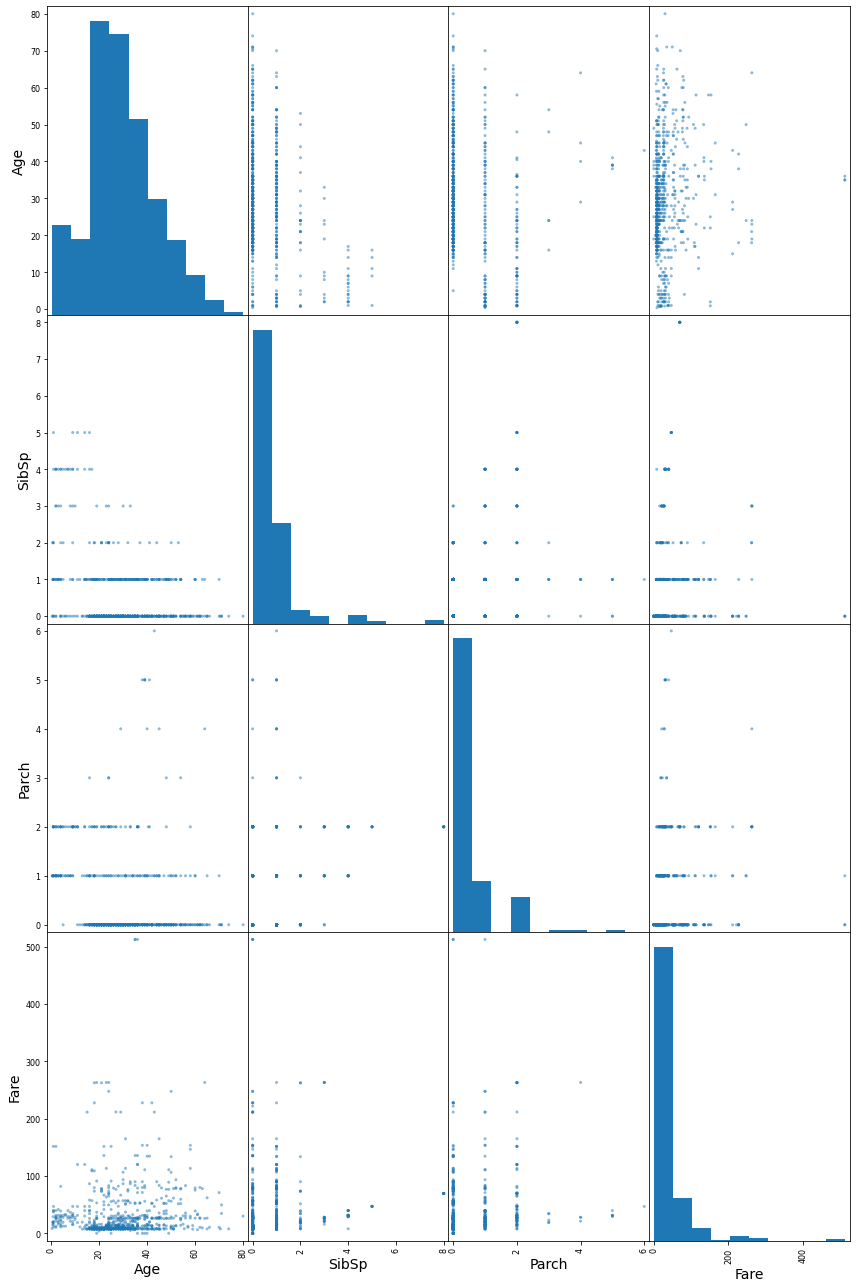

In [202]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(train_num, figsize=(12,18))
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [203]:
# We can compare the survival rate across the features
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Although the differences between the average values, for those that survived and those who did not, is not very significant in each of the features, we can see that the  young, the rich, those with parents onboard and those without siblings were more likely to survive.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


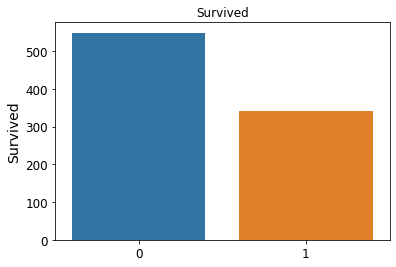

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


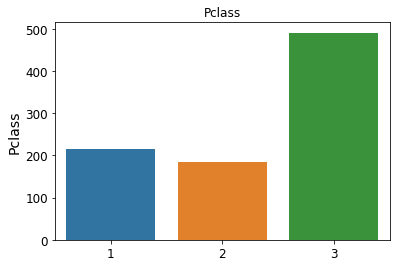

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


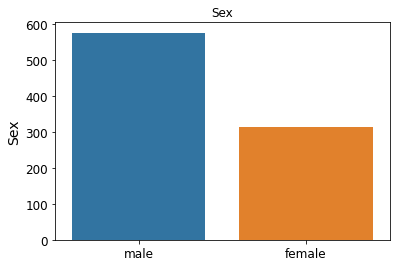

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


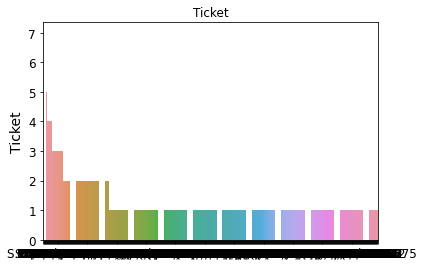

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


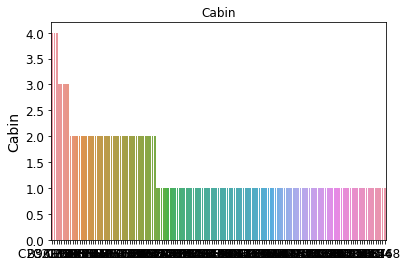

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


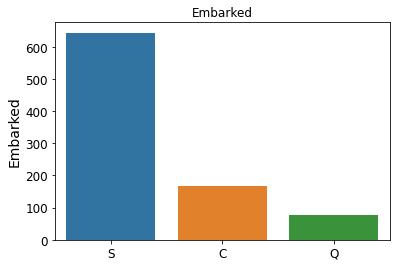

In [204]:
#viewing distribution of the categorical data by their value counts
for col in train_cat.columns:
    sns.barplot(train_cat[col].value_counts().index, train_cat[col].value_counts()).set_title(col)
    plt.show()

In [205]:
#Now, let's see the survival rate across each of the categorical variables

print(pd.pivot_table(train, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


We see that Pclass is a very significant factor for survival since those in first class have a significantli higher rate of survival than those in 3rd class. Sex is also significant, favoring women.

## Feature Engineering

In [206]:
# Let's break the cabin column to see if the survival rate depends on what letter the cabin value contains. 
# Since we saw above that the cabin feature has lots of null values, we will evaluate the nulls as another feature for those who had no cabins

train['cabin_letter'] = train['Cabin'].apply(lambda x: str(x)[0])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test,cabin_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [207]:
# comparing the survival rate by the cabin type/letter
pd.pivot_table(train, index='Survived', columns='cabin_letter', values='Ticket', aggfunc='count')

cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


It can be seen that while some letters have more survival rate than others, you have atleast 50% chance of surviving if you had a cabin assigned to you, compared to only 30% if you didn't have a cabin.

In [208]:
# We can also break down the ticket values into numeric and non-numeric to see if any of them affects survival
train['ticket_numeric'] = train['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letter'] = train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test,cabin_letter,ticket_numeric,ticket_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0


In [209]:
train['ticket_numeric'].value_counts()

1    661
0    230
Name: ticket_numeric, dtype: int64

In [210]:
# comparing survival rate among numeric and non-numeric tickets
pd.pivot_table(train, index='Survived', columns='ticket_numeric', values='Ticket', aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [211]:
#comparing survival rates across the different non-numeric types
pd.pivot_table(train, index='Survived', columns='ticket_letter', values='Ticket', aggfunc='count')

ticket_letter,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [212]:
# Let's add a title feature. It may be possible that a person's title affects their possibility of survival

train['title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [213]:
#comparing survival rates across the different titles
pd.pivot_table(train, index='Survived', columns='title', values='Ticket', aggfunc='count')

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


From the value counts, we can group some of the values. Mr, Miss, Mrs and Master have higher counts, so we keep them as is. we also notice a trend that female titles and royalty, tend to survive, so we keep them. The other titles have very low occurences and show no trends which makes it logical to group them together under 'Others'

In [214]:
train['title'] = train['title'].apply(lambda x: x if x in ['Mrs', 'Mr', 'Miss', 'Master', 'Ms','Mlle', 'Mme', 'Lady', 'the Countess'] else 'Others')
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Others           21
Mlle              2
Mme               1
Ms                1
Lady              1
the Countess      1
Name: title, dtype: int64

In [215]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train/test,cabin_letter,ticket_numeric,ticket_letter,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr


## Data Preprocessing

Since we want to make sure that the resulting train and test sets have same columns, we do the preprocessing on the combined train and test data.
We now repeat thesame transformations above, this time, on the combined data

<AxesSubplot:>

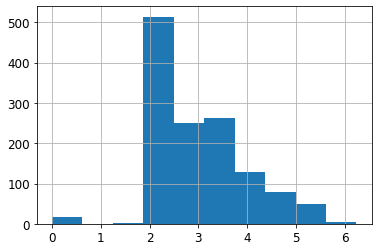

In [216]:
#creating the new categorical features for the entire data

data['cabin_letter'] = data['Cabin'].apply(lambda x: str(x)[0])
data['ticket_numeric'] = data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letter'] = data['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) >0 else 0)
data['title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# imputing null values for numeric data
data['Age'] = data['Age'].fillna(train['Age'].mean())
data['Fare'] = data['Fare'].fillna(train['Fare'].mean())

# dropping null rows from 'Embarked' column
data.dropna(subset=['Embarked'], inplace = True)

# normalizing the 'Fare' column to get a fairly normal distribution
data['fare_norm'] = np.log(data['Fare']+1)
data['fare_norm'].hist()


In [217]:
# Encoding categorical variables
data_dummies = pd.get_dummies(data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'fare_norm', 'Embarked', 'cabin_letter', 'ticket_numeric', 'ticket_letter', 'title', 'train/test']])

# Train test split
X_train = data_dummies[data_dummies['train/test'] == 0].drop(['train/test'], axis=1)
X_test = data_dummies[data_dummies['train/test'] == 1].drop(['train/test'], axis=1)
y_train = data[data['train/test'] == 0][['Survived']]
y_train

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [218]:
# Feature scaling the numeric variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_dummies_scaled = data_dummies.copy()
data_dummies_scaled[['Age', 'SibSp', 'Parch', 'fare_norm']] = sc.fit_transform(data_dummies_scaled[['Age', 'SibSp', 'Parch', 'fare_norm']])

X_train_scaled = data_dummies_scaled[data_dummies_scaled['train/test'] == 0].drop(['train/test'], axis=1)
X_test_scaled = data_dummies_scaled[data_dummies_scaled['train/test'] == 1].drop(['train/test'], axis=1)

In [219]:
# Feature importance

rnd_clf.fit(X_train_scaled, y_train.values.ravel())
rnd_clf.feature_importances_

for name, score in zip(X_train_scaled.columns, rnd_clf.feature_importances_):
    print(name, score)

Pclass 0.06333909229570428
Age 0.20155654187396013
SibSp 0.046069354756681925
Parch 0.03182411360771778
fare_norm 0.18059794040230817
ticket_numeric 0.009977585627254464
Sex_female 0.08617849457428994
Sex_male 0.06890027695433329
Embarked_C 0.012100729330585007
Embarked_Q 0.007865518804348522
Embarked_S 0.013173012577800104
cabin_letter_A 0.0030733092586720657
cabin_letter_B 0.007045236908000613
cabin_letter_C 0.007727704995023858
cabin_letter_D 0.007719249195077379
cabin_letter_E 0.009325153425205837
cabin_letter_F 0.002003315387387898
cabin_letter_G 0.0019013985765499036
cabin_letter_T 0.00038939529522908067
cabin_letter_n 0.027922171795168496
ticket_letter_0 0.008555809012465181
ticket_letter_a2 0.0
ticket_letter_a4 0.0008627989395471043
ticket_letter_a5 0.00280570232454833
ticket_letter_aq3 0.0
ticket_letter_aq4 0.0
ticket_letter_as 2.7367622126910552e-05
ticket_letter_c 0.0019565157773696455
ticket_letter_ca 0.0037342331343545097
ticket_letter_casoton 1.0770213896778297e-05
ticket

## Model Building

Here, we try several models on the training data using cross validation. It is more convenient to validate each model on part of the training data since in this case, we were not supplied the test labels against which we could calculate accuracy scores (-the purpose of the project is to predict test results).

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score


In [221]:
# Creating and training a logistic regressor
log_clf = LogisticRegression()
CV = cross_val_score(log_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8200660191709515


In [222]:
# Creating and training a KNN classifier
knn_clf = KNeighborsClassifier()
CV = cross_val_score(knn_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.820040627182124


In [223]:
# Creating and training a support vector machine classifier
svm_clf = SVC()
CV = cross_val_score(svm_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8324319177299563


In [224]:
# Creating and training a random forest classifier
rnd_clf = RandomForestClassifier()
CV = cross_val_score(rnd_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8099409636259761


In [225]:
# Creating and training a Gradient Boosting classifier

gb_clf = GradientBoostingClassifier()  #(max_depth=2, n_estimators=50, learning_rate=0.2, random_state=42)
CV = cross_val_score(gb_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8268075922046594


In [226]:
# Creating and training an Extreme Gradient Boosting classifier - XGBoost
xgb_clf = xgboost.XGBClassifier()
CV = cross_val_score(xgb_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.826769504221418


In [227]:
# Creating and training a voting classifier

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf), ('svm', svm_clf), ('xgb', xgb_clf)],  #giving each classifier another name in the voting classifier class
                                           voting='hard')
CV = cross_val_score(voting_clf, X_train_scaled, y_train.values.ravel(),cv=5)

print(CV.mean())

0.8358027042468101


In [228]:
# Creating and training a bagging classifier - boot-strap aggregating

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
                           max_samples=100, bootstrap=True, random_state=42)
CV = cross_val_score(bag_clf, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.823411413698978


The voting classifier is seen to produce a better model than the bagging classifier and the other individual classifiers. So, after tuning some of the models, we will use the tuned models to build another voting classifier and compare it to the one above.

## Model tuning

Here, we will do some grid search to get the optimal hyperparameter values for each of the above models.

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
# GradientBoostingClassifier GridSearch

param_grid = [
    {'max_depth': [3.5,4,5, 6], 'n_estimators': [15,20,22], 'learning_rate': [0.07,0.08, 0.09]}
  ]
gb_clf2 = GradientBoostingClassifier(random_state=42)
# train across 3 folds
grid_search_cv = GridSearchCV(gb_clf2, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train_scaled, y_train.values.ravel())

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best parameters are:  {'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 20}


In [231]:
# training the GradientBoosting classifier with the best parameters
gb_optimal = GradientBoostingClassifier(learning_rate=0.08, max_depth=5, n_estimators = 20)
CV = cross_val_score(gb_optimal, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8279184917158636


In [232]:
# RandomForestClassifier GridSearch

param_grid = [
    {'max_depth': [6,7,8], 'n_estimators': [170,180, 190], 'min_samples_split': [1,2,3]}
  ]
rnd_clf2 = RandomForestClassifier(random_state=42)
# train across 3 folds
grid_search_cv = GridSearchCV(rnd_clf2, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train_scaled, y_train.values.ravel())

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

The best parameters are:  {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 190}


In [233]:
# training the random forest classifier with the best parameters
rnd_optimal = RandomForestClassifier(max_depth=7, min_samples_split=2, n_estimators=190)
CV = cross_val_score(rnd_optimal, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8313083222243384


In [234]:
# Logistic Regressor GridSearch

param_grid = [
    {'max_iter': [100,150,200], 'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
  ]
log_clf2 = LogisticRegression()
# train across 3 folds
grid_search_cv = GridSearchCV(log_clf2, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train_scaled, y_train.values.ravel())

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best parameters are:  {'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [235]:
# training the logistic regressor with the best parameters
log_optimal = LogisticRegression(max_iter=100, C=4.281332398719396, penalty='l2', solver = 'liblinear')
CV = cross_val_score(log_optimal, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.8200660191709515


In [236]:
# KNN GridSearch

param_grid = [
    {'n_neighbors': [3,5,7,8,9], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'weights': ['uniform', 'distance'], 'p': [1,2,3]}
  ]
knn_clf2 = KNeighborsClassifier()
# train across 3 folds
grid_search_cv = GridSearchCV(knn_clf2, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train_scaled, y_train.values.ravel())

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
The best parameters are:  {'algorithm': 'ball_tree', 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}


In [237]:
# training the KNN classifier with the best parameters
knn_optimal = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, p=2, weights = 'uniform')
CV = cross_val_score(knn_optimal, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.823417761696185


In [238]:
# Support Vector Classifier GridSearch

param_grid = [
    {'C': [1, 2, 3, 4], 
              'gamma': [1, 0.08, 0.05, 0.1, 0.2, 0.01],
              'kernel': ['rbf', 'poly', 'sigmoid']}
  ]
svm_clf2 = SVC()
# train across 3 folds
grid_search_cv = GridSearchCV(svm_clf2, param_grid, cv=3, verbose=1)
grid_search_cv.fit(X_train_scaled, y_train.values.ravel())

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
The best parameters are:  {'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [239]:
# training a support vector machine classifier with best parameters
svm_optimal = SVC(C=3, gamma=0.1, kernel='rbf')
CV = cross_val_score(svm_optimal, X_train_scaled, y_train.values.ravel(), cv=5)

print(CV.mean())

0.829073827207516


## Building other voting classifiers, this time, using the optimally tuned models (best models) in different combinations

In [240]:
# Hard voting

voting_clf2 = VotingClassifier(estimators=[('lr2', log_optimal), ('rf2', rnd_optimal), ('knn2', knn_optimal), ('svm2', svm_optimal), ('gb', gb_optimal)],  #giving each classifier another name in the voting classifier class
                                           voting='hard')
CV = cross_val_score(voting_clf2, X_train_scaled, y_train.values.ravel(),cv=5)

print(CV.mean())

0.8369453437440487


In [241]:
voting_clf3 = VotingClassifier(estimators=[('gb', gb_optimal), ('rf2', rnd_optimal), ('knn2', knn_optimal), ('svm2', svm_optimal)],  
                                           voting='hard')
CV = cross_val_score(voting_clf3, X_train_scaled, y_train.values.ravel(),cv=5)

print(CV.mean())

0.8414333777693137


In [242]:
voting_clf4 = VotingClassifier(estimators=[('lr2', log_optimal), ('rf2', rnd_optimal), ('svm2', svm_optimal), ('gb', gb_optimal)],  
                                           voting='hard')
CV = cross_val_score(voting_clf4, X_train_scaled, y_train.values.ravel(),cv=5)

print(CV.mean())

0.833568209229988


In [243]:
voting_clf5 = VotingClassifier(estimators=[('rf2', rnd_optimal), ('knn2', knn_optimal), ('svm2', svm_optimal)],  
                               voting='hard')
CV = cross_val_score(voting_clf5, X_train_scaled, y_train.values.ravel(),cv=5)

print(CV.mean())

0.8358154002412238


voting_clf3 produced the best accuracy on the validation data.

## Predictions

In [244]:
X_test_scaled.head()

,Pclass,Age,SibSp,Parch,fare_norm,ticket_numeric,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess
0,3,0.364532,-0.479537,-0.445407,-0.826704,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,1.336872,0.480272,-0.445407,-0.928672,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.503681,-0.479537,-0.445407,-0.629214,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,-0.218872,-0.479537,-0.445407,-0.733456,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,-0.607808,0.480272,0.709647,-0.404079,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [245]:
# Fitting the best model on the training set and then running predictions on the testing set.

voting_clf3.fit(X_train_scaled,y_train.values.ravel())

y_hat = voting_clf3.predict(X_test_scaled)
y_hat

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [246]:
# Putting together the final dataframe for submission, with columns, 'Passenger Id' and 'Survived'

results = pd.DataFrame(data = {'PassengerId': test['PassengerId'], 'Survived': y_hat})

results


,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


## Submission of results

In [248]:
results.to_csv("submission.csv", index = None)